In [1]:
!pip install folium
!pip install matplotlib

In [2]:
!pip install earthengine-api

In [3]:
# Install required packages if not already installed
!pip install earthengine-api folium

In [4]:
!pip install geopy

In [5]:
import datetime
import ee
import folium
import matplotlib.pyplot as plt

In [7]:
# Authenticate the Earth Engine API
ee.Authenticate()

# Initialize the Earth Engine API with the correct project ID
ee.Initialize(project='ee-shahzebfaisal1942546')  # Replace 'your-new-project-id' with your actual project ID

# Fetch Landsat 8 image
landsat = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterDate('2020-01-01', '2020-12-31') \
    .sort('CLOUD_COVER') \
    .first()

# Calculate NDVI for Landsat image
def calculate_ndvi(image):
    ndvi = image.normalizedDifference(['B5', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

landsat_with_ndvi = calculate_ndvi(landsat)
ndvi = landsat_with_ndvi.select('NDVI')

# Create a map centered on a specific location
map_center = [37.5, -122.1]  # Example coordinates, you can adjust as needed
m = folium.Map(location=map_center, zoom_start=10)

# Define visualization parameters for NDVI
ndvi_params = {
    'min': 0.0,
    'max': 1.0,
    'palette': ['blue', 'white', 'green']
}

# Add NDVI layer to the map
ndvi_map_id = ndvi.getMapId(ndvi_params)
folium.TileLayer(
    tiles=ndvi_map_id['tile_fetcher'].url_format,
    attr='Google Earth Engine',
    overlay=True,
    name='NDVI',
).add_to(m)

# Add layer control to the map
folium.LayerControl().add_to(m)

# Save the map to an HTML file and display it
m.save('landsat8_ndvi_map.html')
m


/usr/local/lib/python3.10/dist-packages/ee/deprecation.py:204: DeprecationWarning: 

Attention required for LANDSAT/LC08/C01/T1_SR! You are using a deprecated asset.
To ensure continued functionality, please update it by July 1, 2024.
Learn more: https://developers.google.com/earth-engine/landsat_c1_to_c2

  warnings.warn(warning, category=DeprecationWarning)


In [8]:
# Define an area of interest
aoi = ee.Geometry.Polygon([[
    [-122.6, 37.0],
    [-122.6, 38.0],
    [-121.6, 38.0],
    [-121.6, 37.0]
]])

# Fetch Landsat 8 image
landsat = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(aoi) \
    .filterDate('2020-01-01', '2020-12-31') \
    .sort('CLOUD_COVER') \
    .first()

# Calculate NDVI for Landsat image
def calculate_ndvi(image):
    ndvi = image.normalizedDifference(['B5', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

landsat_with_ndvi = calculate_ndvi(landsat)
ndvi = landsat_with_ndvi.select('NDVI')

# Create a map centered on the area of interest
map_center = [37.5, -122.1]
m = folium.Map(location=map_center, zoom_start=10)

# Define visualization parameters for NDVI
ndvi_params = {
    'min': 0.0,
    'max': 1.0,
    'palette': ['blue', 'white', 'green']
}

# Add NDVI layer to the map
ndvi_map_id = ndvi.getMapId(ndvi_params)
folium.TileLayer(
    tiles=ndvi_map_id['tile_fetcher'].url_format,
    attr='Google Earth Engine',
    overlay=True,
    name='NDVI',
).add_to(m)

# Add layer control to the map
folium.LayerControl().add_to(m)

# Save the map to an HTML file and display it
m.save('landsat8_ndvi_map.html')
m

In [9]:
# Define an area of interest
aoi = ee.Geometry.Polygon([[
    [-100.6, 36.5],
    [-100.6, 37.0],
    [-101.6, 37.0],
    [-101.6, 36.5]
]])

# Fetch Landsat 8 image collection
landsat_collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(aoi) \
    .filterDate('2018-01-01', '2022-01-01')

# Define a function to calculate and add NDVI band
def add_ndvi(image):
    ndvi = image.normalizedDifference(['B5', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

# Map over the collection to add NDVI band to each image
landsat_with_ndvi = landsat_collection.map(add_ndvi)

# Create a folium map centered on the area of interest
map_center = [37.5, -122.1]
m = folium.Map(location=map_center, zoom_start=10)

# Function to create NDVI visualization layer
def add_ndvi_layer(map_object, image):
    ndvi = image.select('NDVI')
    ndvi_params = {'min': 0.0, 'max': 1.0, 'palette': ['blue', 'white', 'green']}
    ndvi_map_id = ndvi.getMapId(ndvi_params)
    folium.TileLayer(
        tiles=ndvi_map_id['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        overlay=True,
        name='NDVI',
    ).add_to(map_object)

# Add NDVI layer to the map
landsat_image = landsat_with_ndvi.median()
add_ndvi_layer(m, landsat_image)

# Save the map to an HTML file and display it
m.save('landsat8_ndvi_map.html')
m

# Calculate EVI
def calculate_evi(image):
    evi = image.expression(
        '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))', {
          'NIR': image.select('B5'),
          'RED': image.select('B4'),
          'BLUE': image.select('B2')
    }).rename('EVI')
    return image.addBands(evi)

# Map over the Landsat image collection to calculate EVI
landsat_with_evi = landsat_collection.map(calculate_evi)

# Select the EVI band and visualize on the map
evi = landsat_with_evi.select('EVI').median()

# Add EVI layer to the map
evi_params = {'min': -1, 'max': 1, 'palette': ['FF0000', 'FFFFFF', '0000FF']}
evi_map_id = evi.getMapId(evi_params)
folium.TileLayer(
    tiles=evi_map_id['tile_fetcher'].url_format,
    attr='Google Earth Engine',
    overlay=True,
    name='EVI',
).add_to(m)

# Save the map to an HTML file and display it
m.save('evi_map.html')
m

# Define time periods for change detection
start_date = '2019-01-01'
end_date = '2020-01-01'

# Fetch Landsat images for the two time periods
landsat_before = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(aoi) \
    .filterDate(start_date, end_date) \
    .median()

landsat_after = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(aoi) \
    .filterDate('2021-01-01', '2022-01-01') \
    .median()

# Calculate NDVI for both time periods
ndvi_before = landsat_before.normalizedDifference(['B5', 'B4']).rename('NDVI')
ndvi_after = landsat_after.normalizedDifference(['B5', 'B4']).rename('NDVI')

# Perform change detection
ndvi_change = ndvi_after.subtract(ndvi_before)
ndvi_change_masked = ndvi_change.updateMask(ndvi_change.abs().gt(0.1))

# Display change detection on the map
ndvi_change_map_id = ndvi_change_masked.getMapId({'palette': 'FF0000'})
folium.TileLayer(
    tiles=ndvi_change_map_id['tile_fetcher'].url_format,
    attr='Google Earth Engine',
    name='NDVI Change',
    overlay=True,
).add_to(m)

# Add layer control to the map
folium.LayerControl().add_to(m)

# Save the map to an HTML file and display it
m.save('ndvi_change_map.html')
m


In [10]:
# Add a marker to the map
marker = folium.Marker(
    location=[37.5, -122.1],
    icon=folium.Icon(icon='cloud')
)
m.add_child(marker)

# Create an HTML popup
html = '<b>This is San Francisco!</b>'

# Parse the HTML string into an object
popup = folium.Popup(html='<b>This is San Francisco!</b>', parse_html=True)
marker.add_child(popup)

# Save the map to an HTML file and display it
m.save('landsat8_map_with_marker.html')
m


In [11]:
# Define an area of interest
aoi = ee.Geometry.Polygon([[
    [-122.6, 37.0],
    [-122.6, 38.0],
    [-121.6, 38.0],
    [-121.6, 37.0]
]])

# Create a time-lapse animation of NDVI over the year
landsat_collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(aoi) \
    .filterDate('2020-01-01', '2020-12-31') \
    .sort('CLOUD_COVER')

def calculate_ndvi(image):
    ndvi = image.normalizedDifference(['B5', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

landsat_collection_with_ndvi = landsat_collection.map(calculate_ndvi)

# Create a map centered on the area of interest
map_center = [37.5, -122.1]
m = folium.Map(location=map_center, zoom_start=10)

# Define visualization parameters for NDVI
ndvi_params = {
    'min': 0.0,
    'max': 1.0,
    'palette': ['blue', 'white', 'green']
}

# Create a time-lapse animation of NDVI
ndvi_animation = folium.Map(location=map_center, zoom_start=10)

frames = []
# Get the images directly as a list of ee.Image objects
image_list = landsat_collection_with_ndvi.toList(landsat_collection_with_ndvi.size()).getInfo()

for image_dict in image_list:
    # Use the image ID to reconstruct the ee.Image object
    image = ee.Image(image_dict['id'])
    ndvi_image = image.normalizedDifference(['B5', 'B4']).rename('NDVI')
    map_id_dict = ndvi_image.getMapId(ndvi_params)
    tiles = map_id_dict['tile_fetcher'].url_format
    frame = folium.raster_layers.TileLayer(
        tiles=tiles,
        attr='Google Earth Engine',
        overlay=True,
        name='NDVI',
    )
    frames.append(frame)

folium.LayerControl().add_to(ndvi_animation)
ndvi_animation.save('landsat8_ndvi_animation.html')
ndvi_animation

In [12]:
# Fetch Landsat 8 image collection
landsat_collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(aoi) \
    .filterDate('2018-01-01', '2022-01-01')

# Define a function to calculate and add NDVI band
def add_ndvi(image):
    ndvi = image.normalizedDifference(['B5', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

# Map over the collection to add NDVI band to each image
landsat_with_ndvi = landsat_collection.map(add_ndvi)

# Print bands of the first image in the collection after NDVI calculation
print("Bands after NDVI calculation:", landsat_with_ndvi.first().bandNames().getInfo())

# Calculate EVI
def calculate_evi(image):
    evi = image.expression(
        '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))', {
          'NIR': image.select('B5'),
          'RED': image.select('B4'),
          'BLUE': image.select('B2')
    }).rename('EVI')
    return image.addBands(evi)

# Map over the Landsat image collection to calculate EVI
landsat_with_evi = landsat_collection.map(calculate_evi)

# Print bands of the first image in the collection after EVI calculation
print("Bands after EVI calculation:", landsat_with_evi.first().bandNames().getInfo())

Bands after NDVI calculation: ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B10', 'B11', 'sr_aerosol', 'pixel_qa', 'radsat_qa', 'NDVI']
Bands after EVI calculation: ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B10', 'B11', 'sr_aerosol', 'pixel_qa', 'radsat_qa', 'EVI']


In [13]:
# Fetch Landsat 8 image collection
landsat_collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')

# Print the initial number of images in the collection
print("Initial number of images:", landsat_collection.size().getInfo())

# Apply filters
landsat_collection = landsat_collection \
    .filterBounds(aoi) \
    .filterDate('2018-01-01', '2022-01-01')

# Print the number of images after filtering
print("Number of images after filtering:", landsat_collection.size().getInfo())


Initial number of images: 1233209
Number of images after filtering: 502


In [14]:
# Select a single image from the collection (e.g., median)
median_ndvi_image = landsat_with_ndvi.median()
median_evi_image = landsat_with_evi.median()

# Extract NDVI and EVI values using sampleRegions on the median images
ndvi_samples = median_ndvi_image.select('NDVI').sampleRegions(aoi, geometries=True)
evi_samples = median_evi_image.select('EVI').sampleRegions(aoi, geometries=True)

# Convert the results to lists
ndvi_values = ndvi_samples.aggregate_array('NDVI').getInfo()
evi_values = evi_samples.aggregate_array('EVI').getInfo()

# Print the extracted values to check if they are empty
print("NDVI Values:", ndvi_values)
print("EVI Values:", evi_values)


NDVI Values: [0.12655863165855408]
EVI Values: [-0.6780421245457151]


In [15]:
# Select a single image from the collection (e.g., median)
median_ndvi_image = landsat_with_ndvi.median()
median_evi_image = landsat_with_evi.median()

# Generate random points within the AOI
num_points = 100  # Adjust the number of points as needed
random_points = ee.FeatureCollection.randomPoints(aoi, num_points)

# Extract NDVI and EVI values using sampleRegions on the median images and random points
ndvi_samples = median_ndvi_image.select('NDVI').sampleRegions(random_points, geometries=True)
evi_samples = median_evi_image.select('EVI').sampleRegions(random_points, geometries=True)

# Convert the results to lists
ndvi_values = ndvi_samples.aggregate_array('NDVI').getInfo()
evi_values = evi_samples.aggregate_array('EVI').getInfo()

# Print the extracted values
print("NDVI Values:", ndvi_values)
print("EVI Values:", evi_values)


NDVI Values: [0.12655863165855408, 0.34825223684310913, 0.34825223684310913, 0.12655863165855408, 0.12655863165855408, 0.34825223684310913, 0.12655863165855408, 0.12655863165855408, 0.34825223684310913, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.34825223684310913, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.34825223684310913, 0.12655863165855408, 0.34825223684310913, 0.34825223684310913, 0.34825223684310913, 0.34825223684310913, 0.12655863165855408, 0.34825223684310913, 0.12655863165855408, 0.12655863165855408, 0.12655863165855408, 0.34825223684310913, 0.12655863165855408, 0.34825223684310913,

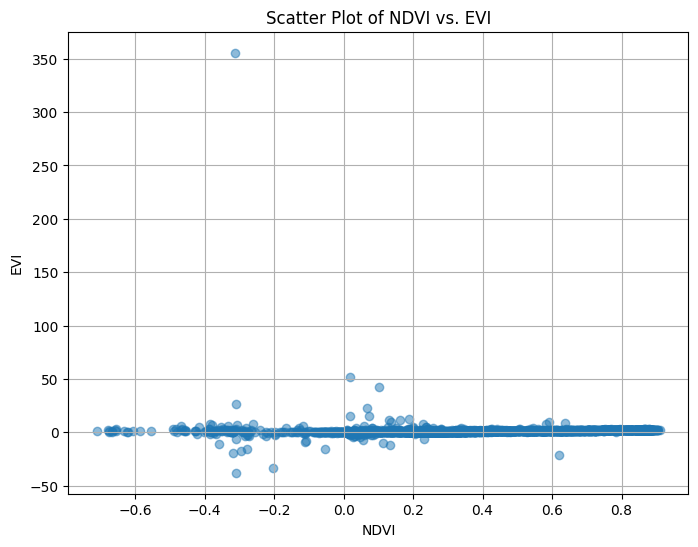

In [16]:
# Define the area of interest (aoi)
aoi = ee.Geometry.Polygon([[
    [-122.5, 37.0],
    [-122.5, 38.0],
    [-121.5, 38.0],
    [-121.5, 37.0],
    [-122.5, 37.0]
]])

# Define the image collection with a smaller date range
landsat_collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(aoi) \
    .filterDate('2020-06-01', '2020-07-31') \
    .sort('CLOUD_COVER')

def calculate_indices(image):
    ndvi = image.normalizedDifference(['B5', 'B4']).rename('NDVI')
    evi = image.expression(
        '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))', {
            'NIR': image.select('B5'),
            'RED': image.select('B4'),
            'BLUE': image.select('B2')
        }).rename('EVI')
    return image.addBands([ndvi, evi])

landsat_collection_with_indices = landsat_collection.map(calculate_indices)

# Create a random sample of points within the AOI
sample_points = ee.FeatureCollection.randomPoints(region=aoi, points=500)

# Sample the image collection at the points
sampled_images = landsat_collection_with_indices.map(lambda img: img.sampleRegions(collection=sample_points, scale=30))

# Flatten the collection of sampled points into a single FeatureCollection
flattened_samples = sampled_images.flatten()

# Convert to a list of dictionaries
sample_data = flattened_samples.getInfo()

# Extract NDVI and EVI values
ndvi_values = [point['properties']['NDVI'] for point in sample_data['features'] if 'NDVI' in point['properties']]
evi_values = [point['properties']['EVI'] for point in sample_data['features'] if 'EVI' in point['properties']]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(ndvi_values, evi_values, alpha=0.5)
plt.xlabel('NDVI')
plt.ylabel('EVI')
plt.title('Scatter Plot of NDVI vs. EVI')
plt.grid(True)
plt.show()


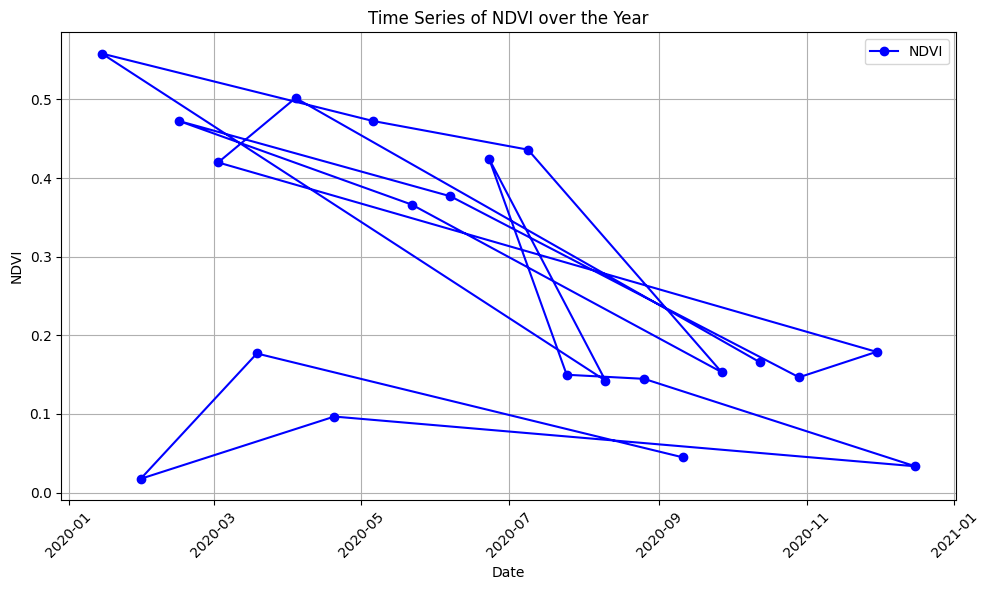

In [17]:
# Extract NDVI time series data
ndvi_time_series = landsat_collection_with_ndvi.select('NDVI').getRegion(aoi.centroid(), scale=30).getInfo()

# Extract dates and NDVI values from the time series data
dates = [str(image[3]) for image in ndvi_time_series[1:]]  # Skip the first row (header) and convert to string
ndvi_values_ts = [float(image[4]) for image in ndvi_time_series[1:]]  # Skip the first row (header)

# Convert milliseconds since epoch to datetime objects
dates = [datetime.datetime.fromtimestamp(int(date) / 1000) for date in dates]

# Create the time series plot of NDVI
plt.figure(figsize=(10, 6))
plt.plot(dates, ndvi_values_ts, marker='o', linestyle='-', color='b', label='NDVI')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('Time Series of NDVI over the Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


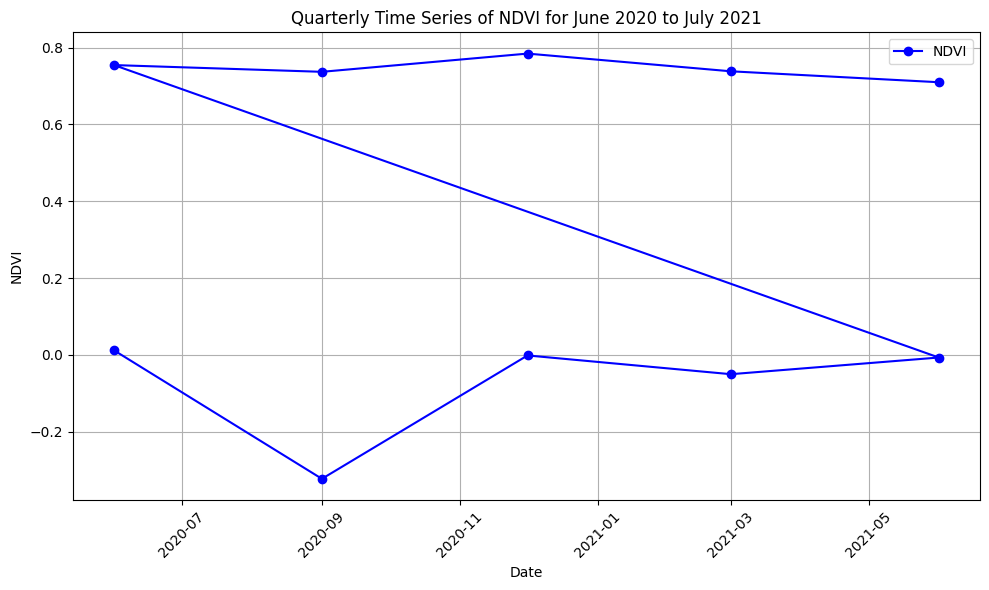

In [18]:
import datetime
import matplotlib.pyplot as plt
import ee

# Initialize the Earth Engine library
ee.Initialize()

# Define the area of interest (aoi)
aoi = ee.Geometry.Polygon([[
    [-122.5, 37.0],
    [-122.5, 37.5],
    [-121.5, 37.5],
    [-121.5, 37.0],
    [-122.5, 37.0]
]])

# Define the image collection with a smaller date range
landsat_collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(aoi) \
    .filterDate('2020-06-01', '2021-07-31') \
    .sort('CLOUD_COVER')

def calculate_indices(image):
    ndvi = image.normalizedDifference(['B5', 'B4']).rename('NDVI')
    evi = image.expression(
        '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))', {
            'NIR': image.select('B5'),
            'RED': image.select('B4'),
            'BLUE': image.select('B2')
        }).rename('EVI')
    return image.addBands([ndvi, evi])

landsat_collection_with_indices = landsat_collection.map(calculate_indices)

# Function to calculate quarterly NDVI median for a spatial subset
def calculate_quarterly_ndvi(image_collection, start_date, end_date, aoi):
    start_date = ee.Date(start_date)
    end_date = ee.Date(end_date)

    # Calculate the number of complete quarters in the date range
    diff_months = ee.Number(end_date.difference(start_date, 'month')).add(1)
    num_quarters = diff_months.divide(3).ceil()  # Use ceil to ensure we cover all quarters

    quarters = ee.List.sequence(0, num_quarters.subtract(1))

    def quarterly_median(quarter):
        start = start_date.advance(ee.Number(quarter).multiply(3), 'month')
        end = start.advance(3, 'month')
        return image_collection.filterDate(start, end).median().set('system:time_start', start.millis())

    quarterly_ndvi = ee.ImageCollection.fromImages(quarters.map(quarterly_median))

    # Get time series data for the AOI
    ndvi_time_series = quarterly_ndvi.getRegion(aoi, scale=50000).getInfo()

    # Extract dates and NDVI values
    dates = [datetime.datetime.fromtimestamp(image[3]/1000) for image in ndvi_time_series[1:]]  # Skip the first row (header)
    ndvi_values_ts = [image[4] for image in ndvi_time_series[1:]]  # Skip the first row (header)

    # Create the time series plot of NDVI
    plt.figure(figsize=(10, 6))
    plt.plot(dates, ndvi_values_ts, marker='o', linestyle='-', color='b', label='NDVI')
    plt.xlabel('Date')
    plt.ylabel('NDVI')
    plt.title('Quarterly Time Series of NDVI for June 2020 to July 2021')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()

# Calculate quarterly NDVI for the specified date range and AOI
calculate_quarterly_ndvi(landsat_collection_with_indices.select('NDVI'), '2020-06-01', '2021-07-31', aoi)


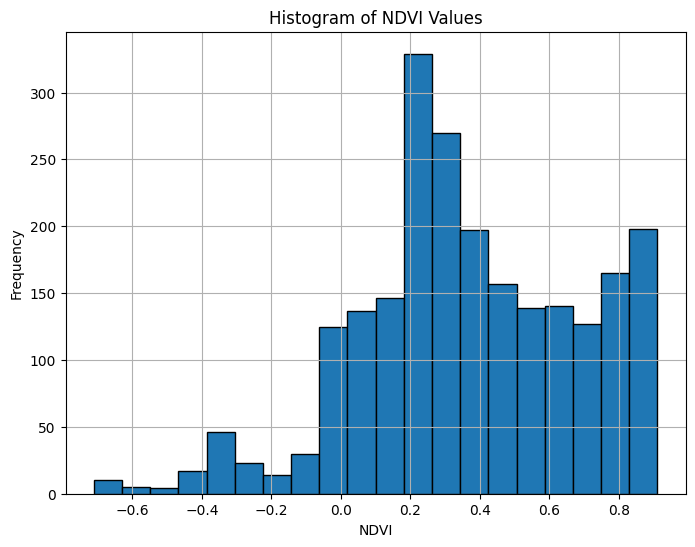

In [19]:
# Create a histogram of NDVI values
plt.figure(figsize=(8, 6))
plt.hist(ndvi_values, bins=20, edgecolor='black')
plt.xlabel('NDVI')
plt.ylabel('Frequency')
plt.title('Histogram of NDVI Values')
plt.grid(True)
plt.show()


In [20]:
from geopy.geocoders import Nominatim

# Function to geocode a city name into coordinates and get its bounding box
def geocode_city(city_name):
    geolocator = Nominatim(user_agent="sabagulbashir@gmail.com")  # Replace with your email
    location = geolocator.geocode(city_name)
    bounding_box = location.raw['boundingbox']
    bbox = [
        [float(bounding_box[0]), float(bounding_box[2])],
        [float(bounding_box[1]), float(bounding_box[3])]
    ]
    return location.latitude, location.longitude, bbox

# Define a function to fetch Landsat imagery for a given location
def fetch_landsat_imagery(bbox, start_date, end_date):
    # Create a polygon geometry for the given bounding box
    aoi = ee.Geometry.Polygon([
        [bbox[0][1], bbox[0][0]],
        [bbox[1][1], bbox[0][0]],
        [bbox[1][1], bbox[1][0]],
        [bbox[0][1], bbox[1][0]],
        [bbox[0][1], bbox[0][0]]
    ])

    # Fetch Landsat 8 image collection for the AOI and date range
    landsat_collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
        .filterBounds(aoi) \
        .filterDate(start_date, end_date)

    return landsat_collection

# Define a function to calculate and add NDVI band to Landsat images
def add_ndvi(image):
    ndvi = image.normalizedDifference(['B5', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

# Define a function to calculate EVI for Landsat images
def calculate_evi(image):
    evi = image.expression(
        '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))', {
          'NIR': image.select('B5'),
          'RED': image.select('B4'),
          'BLUE': image.select('B2')
    }).rename('EVI')
    return image.addBands(evi)

# Function to calculate NDVI change between two periods
def calculate_ndvi_change(bbox, start_date1, end_date1, start_date2, end_date2):
    # Fetch Landsat imagery for the two periods
    collection1 = fetch_landsat_imagery(bbox, start_date1, end_date1).map(add_ndvi)
    collection2 = fetch_landsat_imagery(bbox, start_date2, end_date2).map(add_ndvi)

    # Calculate median NDVI for the two periods
    ndvi1 = collection1.median().select('NDVI')
    ndvi2 = collection2.median().select('NDVI')

    # Calculate NDVI change
    ndvi_change = ndvi2.subtract(ndvi1).rename('NDVI_Change')
    return ndvi_change

# Function to create a Folium map centered on a location
def create_map(center, bbox):
    m = folium.Map(location=center, zoom_start=12)
    folium.Rectangle(bounds=bbox, color='blue', fill=True, fill_opacity=0.2).add_to(m)
    return m

# Input city name
city_name = input("Enter the place name: ")

# Geocode the city name into coordinates and bounding box
latitude, longitude, bbox = geocode_city(city_name)

# Fetch Landsat imagery for the location
landsat_collection = fetch_landsat_imagery(bbox, '2018-01-01', '2022-01-01')

# Add NDVI band to the Landsat images
landsat_with_ndvi = landsat_collection.map(add_ndvi)

# Add EVI band to the Landsat images
landsat_with_evi = landsat_collection.map(calculate_evi)

# Calculate NDVI change between two periods
ndvi_change = calculate_ndvi_change(bbox, '2018-01-01', '2019-01-01', '2021-01-01', '2022-01-01')

# Create a Folium map centered on the location
m = create_map([latitude, longitude], bbox)

# Function to create NDVI visualization layer
def add_layer(map_object, image, band, name, palette, show=False):
    params = {'min': 0.0, 'max': 1.0, 'palette': palette}
    map_id = image.select(band).getMapId(params)
    folium.TileLayer(
        tiles=map_id['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        overlay=True,
        name=name,
        show=show,
    ).add_to(map_object)

# Add NDVI, EVI, and NDVI Change layers to the map
ndvi_layer = landsat_with_ndvi.median().select('NDVI')
evi_layer = landsat_with_evi.median().select('EVI')

add_layer(m, ndvi_layer, 'NDVI', 'NDVI', ['blue', 'white', 'green'])
add_layer(m, evi_layer, 'EVI', 'EVI', ['red', 'white', 'blue'])
add_layer(m, ndvi_change, 'NDVI_Change', 'NDVI Change', ['red', 'white', 'green'])

# Add layer control to the map
folium.LayerControl().add_to(m)

# Save the map to an HTML file and display it
m.save('landsat_ndvi_evi_map.html')
m


Enter the place name: london


In [21]:
# Function to geocode a city name into coordinates and get its bounding box
def geocode_city(city_name):
    geolocator = Nominatim(user_agent="sabagulbashir@gmail.com")  # Replace with your email
    location = geolocator.geocode(city_name)
    if location is None:
        raise ValueError(f"Could not find coordinates for {city_name}. Please check the city name.")

    bounding_box = location.raw['boundingbox']
    bbox = [
        [float(bounding_box[0]), float(bounding_box[2])],
        [float(bounding_box[1]), float(bounding_box[3])]
    ]
    return location.latitude, location.longitude, bbox

# Define a function to fetch Landsat imagery for a given location
def fetch_landsat_imagery(bbox, start_date, end_date):
    # Create a polygon geometry for the given bounding box
    aoi = ee.Geometry.Polygon([
        [bbox[0][1], bbox[0][0]],
        [bbox[1][1], bbox[0][0]],
        [bbox[1][1], bbox[1][0]],
        [bbox[0][1], bbox[1][0]],
        [bbox[0][1], bbox[0][0]]
    ])

    # Fetch Landsat 8 image collection for the AOI and date range
    landsat_collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
        .filterBounds(aoi) \
        .filterDate(start_date, end_date)

    return landsat_collection

# Define a function to calculate and add NDVI band to Landsat images
def add_ndvi(image):
    ndvi = image.normalizedDifference(['B5', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

# Function to calculate NDVI change between two periods
def calculate_ndvi_change(bbox, start_date1, end_date1, start_date2, end_date2):
    # Fetch Landsat imagery for the two periods
    collection1 = fetch_landsat_imagery(bbox, start_date1, end_date1).map(add_ndvi)
    collection2 = fetch_landsat_imagery(bbox, start_date2, end_date2).map(add_ndvi)

    # Calculate median NDVI for the two periods
    ndvi1 = collection1.median().select('NDVI')
    ndvi2 = collection2.median().select('NDVI')

    # Calculate NDVI change
    ndvi_change = ndvi2.subtract(ndvi1).rename('NDVI_Change')
    return ndvi_change

# Function to create a Folium map centered on a location
def create_map(center, bbox):
    m = folium.Map(location=center, zoom_start=12)
    folium.Rectangle(bounds=bbox, color='blue', fill=True, fill_opacity=0.2).add_to(m)
    return m

# Input city name
while True:
    city_name = input("Enter the place name: ")
    try:
        # Geocode the city name into coordinates and bounding box
        latitude, longitude, bbox = geocode_city(city_name)
        break  # Exit the loop if geocoding is successful
    except ValueError as e:
        print(e)  # Print the error message and prompt again

# Fetch Landsat imagery for the location
landsat_collection = fetch_landsat_imagery(bbox, '2018-01-01', '2022-01-01')

# Add NDVI band to the Landsat images
landsat_with_ndvi = landsat_collection.map(add_ndvi)

# Calculate median NDVI within the bounding box
median_ndvi = landsat_with_ndvi.median().select('NDVI')

# Function to plot NDVI time series
def plot_ndvi_time_series(image_collection):
    # Get NDVI values
    ndvi_data = image_collection.reduceColumns(ee.Reducer.toList(), ['NDVI']).getInfo()

    # Get dates
    dates_data = image_collection.reduceColumns(ee.Reducer.toList(), ['system:time_start']).getInfo()

    # Extract dates and NDVI values
    if isinstance(dates_data['list'][0], list):
        dates = [ee.Date(d / 1000).format('YYYY-MM-dd').getInfo() for d in dates_data['list'][0]]
    else:
        dates = [ee.Date(dates_data['list'][0] / 1000).format('YYYY-MM-dd').getInfo()]

    # Check if ndvi_data['list'] is not empty
    if ndvi_data['list']:
        ndvi_values = ndvi_data['list'][0]
    else:
        print("No NDVI values found.")
        return

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(dates, ndvi_values, marker='o', linestyle='-', color='b', label='NDVI')
    plt.title('NDVI Time Series')
    plt.xlabel('Date')
    plt.ylabel('NDVI')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot NDVI time series
plot_ndvi_time_series(landsat_with_ndvi)

# Create a Folium map centered on the location
m = create_map([latitude, longitude], bbox)

# Function to create NDVI visualization layer
def add_layer(map_object, image, band, name, palette, show=False):
    params = {'min': 0.0, 'max': 1.0, 'palette': palette}
    map_id = image.select(band).getMapId(params)
    folium.TileLayer(
        tiles=map_id['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        overlay=True,
        name=name,
        show=show,
    ).add_to(map_object)

# Add NDVI layer to the map
add_layer(m, median_ndvi, 'NDVI', 'NDVI', ['blue', 'white', 'green'])

# Add layer control to the map
folium.LayerControl().add_to(m)

# Save the map to an HTML file and display it
m.save('landsat_ndvi_map.html')
m


Enter the place name: pakistan
No NDVI values found.


In [22]:
!pip install geopy folium matplotlib earthengine-api plotly

In [ ]:
import datetime
import ee
import folium
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import plotly.express as px

In [24]:
# Install necessary packages
!pip install Flask
!pip install geopy
!pip install folium
!pip install earthengine-api
!pip install pyngrok

# Download ngrok and authenticate
!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | tee /etc/apt/trusted.gpg.d/ngrok.asc
!echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | tee /etc/apt/sources.list.d/ngrok.list
!apt update && apt install ngrok

# Replace YOUR_NGROK_AUTH_TOKEN with your actual ngrok auth token
!ngrok authtoken 2inH3e3OPS9bpCChMUwmccKaF3w_7wF44DZjYniy3B784XqrJ



-----BEGIN PGP PUBLIC KEY BLOCK-----

mQINBGFGa/IBEAC0pgrns33QSiSipIKRnUCLeXX8d8WQjeqOqVEA6QlavAW54hKn
uHbbf151LFp0eGGaTp5ppJih2u9geiE8GxVACMuCHdlI0d35wAkucr+15qG+rfxm
qLkGGWARsRni3RJwg9R6/MwBgG6lB6mXOws2o/dnB8+wXnES5K9fBL2ZcSgtOQNn
Et0LWhZ3aJP79LMJn5yCuCI4lbKXMVL7LpLEM7gxOD6qjTkn6b34NliTeKwjXw9A
3qWj9UA++51q8lxDlGrklNlQMAUPXLXG22qEGhzmXAL88ldciED1iVL0tzofsVfj
hQPvt7i0xJd9/t42aK1ZtVUJdDjhoIDeZ4IRlT57K1cf3tUgGTD5xhnF7uZHJuqI
kOJc2+JwjLxRRnZE4PzaBzKKBYs/KM3F49Kv7IrlDl8ggwI9c7ReWJtgOOibtGgZ
AX1N+Hh6fNpWlgaf2VLTLU7m9gF1HDumXUC6gunQyzlNYJ4CsFm34E1r8lIMQAX3
SNWdeu119p0KhzCEqNlVxEqvldzoZ5oAqAnqIEVsvuQLblqCh6yDEuV5mTS6pE45
oMEq9jgBQ+mjqkzVpB7g8H7+gcFs/EBIv+V77fN8dqiw+7mKYOFSkvJTiyxnDgSK
0VKFsVRe8pfkrjzZUccPt0cWajoj2rJmD3JcVOcUlCcQnTH/QdKVLB6wewARAQAB
tDhuZ3JvayBhZ2VudCBhcHQgcmVwbyByZWxlYXNlIGJvdCA8cmVsZWFzZS1ib3RA
bmdyb2suY29tPokCTgQTAQgAOBYhBPAnH89xLPLjmQHxow5h07uq7jf+BQJhRmvy
AhsDBQsJCAcCBhUKCQgLAgQWAgMBAh4BAheAAAoJEA5h07uq7jf+0FIP/1RCUUkX
QlUzQDmZzusTfN2oeXN6OHk/4kq+qLlkbsdL11rwoRemGKUQu4Qk

User Interface (UI) Enhancement
1. Integrate with a Web Framework:

In [ ]:
import logging
from flask import Flask, render_template_string, request
import ee
import folium
from geopy.geocoders import Nominatim
from pyngrok import ngrok

app = Flask(__name__)

# Initialize the Earth Engine API
ee.Initialize()

# Set up logging
logging.basicConfig(level=logging.INFO)

def geocode_city(city_name):
    try:
        geolocator = Nominatim(user_agent="your_app_name")
        location = geolocator.geocode(city_name)
        if location:
            lat = location.latitude
            lon = location.longitude
            bbox = [lon-0.05, lat-0.05, lon+0.05, lat+0.05]  # Define a bounding box around the city
            return lat, lon, bbox
        else:
            raise ValueError("City not found")
    except Exception as e:
        logging.error(f"Error in geocode_city: {e}")
        raise

def fetch_landsat_imagery(bbox, start_date, end_date):
    try:
        region = ee.Geometry.Rectangle(bbox)
        landsat_collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')\
                              .filterDate(start_date, end_date)\
                              .filterBounds(region)

        # Check if there are any images in the collection
        count = landsat_collection.size().getInfo()
        if count == 0:
            raise ValueError("No Landsat imagery found for the specified date range and location.")

        return landsat_collection
    except Exception as e:
        logging.error(f"Error in fetch_landsat_imagery: {e}")
        raise

def add_ndvi(image):
    try:
        if not image.bandNames().contains('B5').getInfo() or not image.bandNames().contains('B4').getInfo():
            raise ValueError("Required bands (B5, B4) not found in image")
        ndvi = image.normalizedDifference(['B5', 'B4']).rename('NDVI')
        return image.addBands(ndvi)
    except Exception as e:
        logging.error(f"Error in add_ndvi: {e}")
        raise

index_html = """
<!doctype html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <title>City NDVI Map</title>
  </head>
  <body>
    <h1>Enter City and Date Range</h1>
    <form action="/map" method="post">
      <label for="city">City:</label>
      <input type="text" id="city" name="city"><br><br>
      <label for="start_date">Start Date:</label>
      <input type="date" id="start_date" name="start_date"><br><br>
      <label for="end_date">End Date:</label>
      <input type="date" id="end_date" name="end_date"><br><br>
      <input type="submit" value="Generate Map">
    </form>
  </body>
</html>
"""

map_html = """
<!doctype html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <title>NDVI Map</title>
  </head>
  <body>
    <h1>NDVI Map for {{ city }}</h1>
    <div id="map" style="width: 100%; height: 600px;"></div>
    <script src="https://cdn.jsdelivr.net/npm/leaflet@1.7.1/dist/leaflet.js"></script>
    <script>
      const map = L.map('map').setView([{{ lat }}, {{ lon }}], 10);
      L.tileLayer('https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', {
        maxZoom: 19
      }).addTo(map);
      const ndviLayer = L.tileLayer('{{ ndvi_url }}', {
        attribution: 'Google Earth Engine',
        opacity: 0.6
      }).addTo(map);
    </script>
  </body>
</html>
"""

@app.route('/')
def index():
    return render_template_string(index_html)

@app.route('/map', methods=['POST'])
def generate_map():
    try:
        city_name = request.form['city']
        start_date = request.form['start_date']
        end_date = request.form['end_date']
        logging.info(f"Received request for city: {city_name}, start_date: {start_date}, end_date: {end_date}")

        # Geocode the city and get bounding box
        lat, lon, bbox = geocode_city(city_name)
        logging.info(f"Geocoded city: {city_name}, lat: {lat}, lon: {lon}, bbox: {bbox}")

        # Fetch Landsat imagery and calculate NDVI
        landsat_collection = fetch_landsat_imagery(bbox, start_date, end_date)
        landsat_collection = landsat_collection.map(add_ndvi)
        ndvi = landsat_collection.median().select('NDVI')
        logging.info(f"Fetched Landsat imagery and calculated NDVI")

        # Create map
        m = folium.Map(location=[lat, lon], zoom_start=10)
        ndvi_params = {'min': 0.0, 'max': 1.0, 'palette': ['blue', 'white', 'green']}
        ndvi_map_id = ndvi.getMapId(ndvi_params)
        logging.info(f"Generated NDVI map ID")

        folium.TileLayer(
            tiles=ndvi_map_id['tile_fetcher'].url_format,
            attr='Google Earth Engine',
            overlay=True,
            name='NDVI',
        ).add_to(m)

        folium.LayerControl().add_to(m)
        m.save('map.html')
        logging.info(f"Saved map to map.html")

        with open('map.html') as f:
            map_html_content = f.read()

        return render_template_string(map_html, city=city_name, lat=lat, lon=lon, ndvi_url=ndvi_map_id['tile_fetcher'].url_format)
    except Exception as e:
        logging.error(f"Error in generate_map: {e}", exc_info=True)
        return "An error occurred while generating the map.", 500

# Start ngrok and Flask app
ngrok_tunnel = ngrok.connect(5000)
print(f'Public URL: {ngrok_tunnel.public_url}')
app.run()


Dash: For interactive dashboards.

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.DatePickerRange(id='date-picker-range'),
    dcc.Dropdown(
        id='region-dropdown',
        options=[
            {'label': 'Region 1', 'value': 'region1'},
            {'label': 'Region 2', 'value': 'region2'},
            # Add more options as needed
        ],
        value='region1'  # Default value
    ),
    dcc.Graph(id='index-graph')
])

@app.callback(
    Output('index-graph', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date'),
     Input('region-dropdown', 'value')]
)
def update_graph(start_date, end_date, region):
    # Code to update the graph based on selected inputs
    pass

if __name__ == '__main__':
    app.run_server(debug=True)


Additional Indices Calculation
2. Vegetation and Other Indices:

SAVI, EVI2, NDWI, NDSI: Add these calculations in your GEE script

In [ ]:
var savi = image.expression(
  '((NIR - RED) / (NIR + RED + L)) * (1 + L)', {
    'NIR': image.select('B8'),
    'RED': image.select('B4'),
    'L': 0.5
});

var evi2 = image.expression(
  '2.5 * ((NIR - RED) / (NIR + 2.4 * RED + 1))', {
    'NIR': image.select('B8'),
    'RED': image.select('B4')
});

var ndwi = image.normalizedDifference(['B3', 'B8']);
var ndsi = image.normalizedDifference(['B11', 'B8']);


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import folium

# Simulated data (replace with your actual data or data fetching logic)
nir = np.random.rand(100, 100)  # Example NIR band data
red = np.random.rand(100, 100)  # Example Red band data

# Calculate SAVI
def calculate_savi(nir, red, l=0.5):
    savi = ((nir - red) / (nir + red + l)) * (1 + l)
    return savi

savi_index = calculate_savi(nir, red)

# Calculate EVI2
def calculate_evi2(nir, red):
    evi2 = 2.5 * ((nir - red) / (nir + 2.4 * red + 1))
    return evi2

evi2_index = calculate_evi2(nir, red)

# Calculate NDWI
def calculate_ndwi(green, nir):
    ndwi = (green - nir) / (green + nir)
    return ndwi

# Example visualization using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(nir, cmap='viridis')
plt.title('NIR Band')

plt.subplot(2, 2, 2)
plt.imshow(red, cmap='viridis')
plt.title('Red Band')

plt.subplot(2, 2, 3)
plt.imshow(savi_index, cmap='RdYlGn')
plt.title('SAVI Index')

plt.subplot(2, 2, 4)
plt.imshow(evi2_index, cmap='RdYlGn')
plt.title('EVI2 Index')

plt.tight_layout()
plt.show()

# Example map visualization using folium (replace with actual data and coordinates)
m = folium.Map(location=[45.5236, -122.6750], zoom_start=10)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)

folium.LayerControl().add_to(m)
m.save('map.html')


Change Detection and Classification
3. Change Detection and Land Cover Classification:

Land Cover Classification: Use machine learning algorithms in GEE.

In [ ]:
var training = image.sampleRegions({
  collection: trainingPoints,
  properties: ['class'],
  scale: 30
});

var classifier = ee.Classifier.smileRandomForest(10).train({
  features: training,
  classProperty: 'class',
  inputProperties: bands
});

var classified = image.classify(classifier);


Climate Data Integration
4. Integrate Climate Data:

ERA5, MODIS: Fetch and analyze climate data.

In [ ]:
var era5 = ee.ImageCollection('ECMWF/ERA5/DAILY')
  .select(['total_precipitation', 'mean_2m_air_temperature'])
  .filterDate('2020-01-01', '2020-12-31');

var climateIndex = era5.mean();


Time Series Analysis
5. Advanced Time Series Analysis:

Seasonal Decomposition:

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

series = pd.Series(data)
result = seasonal_decompose(series, model='additive', period=365)
result.plot()


Animated Visualizations:

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
def update(i):
    ax.clear()
    ax.plot(time, data[i])
ani = animation.FuncAnimation(fig, update, frames=len(data))
ani.save('animation.mp4')


Geospatial Analysis
6. Spatial Statistical Analysis:

Moran's I, GWR:

In [ ]:
import geopandas as gpd
from esda.moran import Moran
from mgwr.gwr import GWR, Sel_BW

gdf = gpd.read_file('file.shp')
moran = Moran(gdf['attribute'], gdf['geometry'])


Data Export and Reporting
7. Export and Reporting:

Export Results:

In [ ]:
results.to_csv('results.csv')


Automated Reports:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('results.csv')
df.plot()
plt.savefig('report.png')


Enhanced Map Interactivity
8. Enhanced Map Features:

Drawing Tools:

In [ ]:
var drawingTools = ui.Map.DrawingTools();
Map.add(drawingTools);


Leaflet Integration:

In [ ]:
import folium

m = folium.Map(location=[45.5236, -122.6750])
folium.Marker([45.5236, -122.6750]).add_to(m)
m.save('map.html')


Performance Optimization
9. Optimize Performance:

Caching Mechanisms:

In [ ]:
from flask_caching import Cache

cache = Cache(app, config={'CACHE_TYPE': 'simple'})

@cache.cached(timeout=60)
def get_data():
    return data_source.get_data()


Cloud Integration and Automation
10. Cloud Deployment and Automation:

Deploy on Cloud:

In [ ]:
# Example for deploying a Flask app on AWS Elastic Beanstalk
eb init -p python-3.7 my-app
eb create my-app-env


Automate Tasks:

In [ ]:
from apscheduler.schedulers.blocking import BlockingScheduler

def scheduled_task():
    # Code to perform scheduled tasks
    pass

scheduler = BlockingScheduler()
scheduler.add_job(scheduled_task, 'interval', hours=24)
scheduler.start()
